In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from iterativefg import utils

Using lenspyx alm2map


In [2]:
lmin, lmax, deltal = 5, 4000, 60
bin_edges = np.arange(lmin, lmax, deltal)
bin = lambda cl: utils.bin_theory(cl, bin_edges)

In [13]:
directory_results = pathlib.Path("/scratch/snx3000/odarwish/joint_map_outputs")


ncomponents = 3
version = "phi_omega_alpha_joint"
cmb_version = "phi_alpha"
imin = 0
imax = 63
itmax = 10

qe_key = "p_p"


def get_results(version, cmb_version, imin, imax, itmax, qe_key):
    filenames = f"{version}_{cmb_version}_{imin}_{imax}_{itmax}.npy"
    print(filenames)

    inputs = np.load(directory_results / f"input_{filenames}")
    qe = np.load(directory_results / f"total_qe_{qe_key}_{filenames}")
    qe_cross = np.load(directory_results / f"total_qe_cross_{qe_key}_{filenames}")

    it = np.load(directory_results / f"total_qe_it_{qe_key}_{filenames}")
    it_cross = np.load(directory_results / f"total_qe_it_cross_{qe_key}_{filenames}")

    it_results_mean = np.mean(it[1:, ...], axis=0)
    it_results_std = np.std(it[1:, ...], axis=0)

    it_results_mean_cross = np.mean(it_cross[1:, ...], axis=0)
    it_results_std_cross = np.std(it_cross[1:, ...], axis=0)

    qe_results_mean = np.mean(qe[1:, ...], axis=0)
    qe_results_std = np.std(qe[1:, ...], axis=0)

    qe_results_mean_cross = np.mean(qe_cross[1:, ...], axis=0)
    qe_results_std_cross = np.std(qe_cross[1:, ...], axis=0)

    inputs_mean = np.mean(inputs[1:, ...], axis=0)

    alpha, phi, omega = np.split(inputs_mean, ncomponents)


    alpha_qe, phi_qe, omega_qe = np.split(qe_results_mean, ncomponents)
    alpha_qe_cross, phi_qe_cross, omega_qe_cross = np.split(qe_results_mean_cross, ncomponents)


    itr = 0
    alpha_it, phi_it, omega_it = np.split(it_results_mean[itr], ncomponents)
    alpha_it_cross, phi_it_cross, omega_it_cross = np.split(it_results_mean_cross[itr], ncomponents)

    WF = -alpha_it_cross/alpha

    alpha_it_single, phi_it_single, omega_it_single = np.split(it[0, itr, :], ncomponents)
    alpha_it_cross_single, phi_it_cross_single, omega_it_cross_single = np.split(it_cross[0, itr, :], ncomponents)
    alpha_single, phi_single, omega_single = np.split(inputs[0, :], ncomponents)

    alpha_qe_single, phi_qe_single, omega_qe_single = np.split(qe[0, :], ncomponents)
    alpha_qe_cross_single, phi_qe_cross_single, omega_qe_cross_single = np.split(qe_cross[0, :], ncomponents)


    alpha_results = alpha, alpha_qe, alpha_qe_cross, alpha_it, alpha_it_cross, WF, alpha_single, alpha_qe_single, alpha_qe_cross_single, alpha_it_single, alpha_it_cross_single

    phi_results = phi, phi_qe, phi_qe_cross, phi_it, phi_it_cross, phi_single, phi_qe_single, phi_qe_cross_single, phi_it_single, phi_it_cross_single

    omega_results = omega, omega_qe, omega_qe_cross, omega_it, omega_it_cross, omega_single, omega_qe_single, omega_qe_cross_single, omega_it_single, omega_it_cross_single

    return alpha_results, phi_results, omega_results

In [14]:
alpha_results, _, _ = get_results(version, cmb_version, imin, imax, itmax, qe_key)
alpha, alpha_qe, alpha_qe_cross, alpha_it, alpha_it_cross, WF, alpha_single, alpha_qe_single, alpha_qe_cross_single, alpha_it_single, alpha_it_cross_single = alpha_results

alpha_results_randomized, _, _ = get_results(version+"_randomized", cmb_version, imin, imax, itmax, qe_key)
alpha_randomized, alpha_qe_randomized, alpha_qe_cross_randomized, alpha_it_randomized, alpha_it_cross_randomized, WF_randomized, alpha_single_randomized, alpha_qe_single_randomized, alpha_qe_cross_single_randomized, alpha_it_single_randomized, alpha_it_cross_single_randomized = alpha_results_randomized

phi_omega_alpha_joint_phi_alpha_0_63_10.npy


/tmp/ipykernel_29296/2422213662.py:50: RuntimeWarning: invalid value encountered in divide
  WF = -alpha_it_cross/alpha


phi_omega_alpha_joint_randomized_phi_alpha_0_63_10.npy


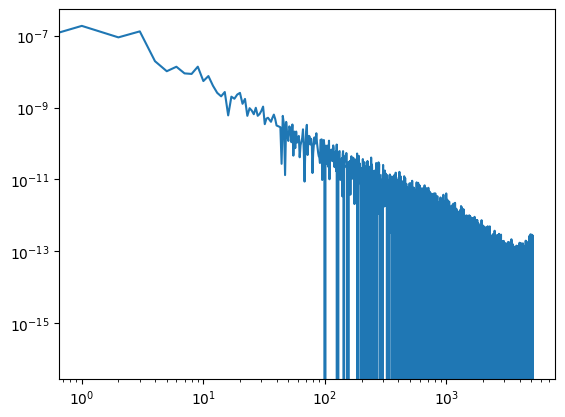

In [16]:
plt.loglog(-alpha_qe_cross_single_randomized)

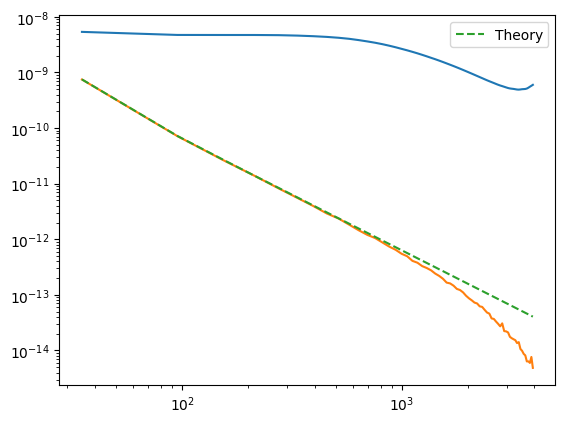

In [10]:
plt.loglog(*bin(alpha_qe))
plt.plot(*bin(-alpha_qe_cross))
plt.plot(*bin(alpha), ls = "--", label = "Theory")
plt.legend()

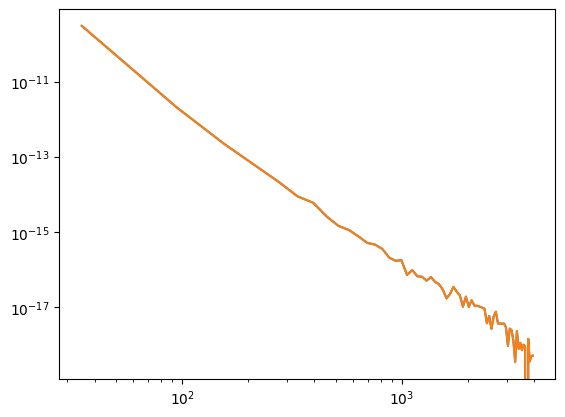

In [12]:
plt.loglog(*bin(-alpha_it_cross_single))
plt.loglog(*bin(-alpha_it_cross_single_randomized))

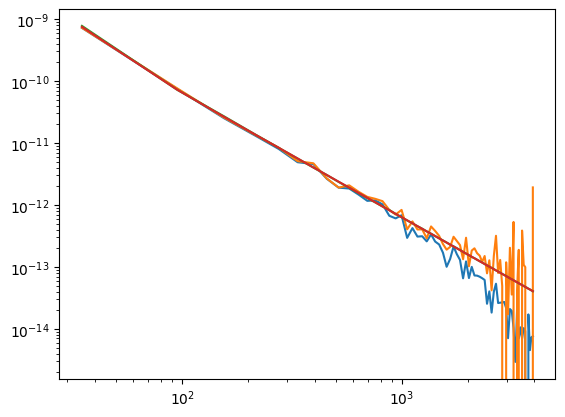

In [ ]:
plt.plot(*bin(-alpha_qe_cross_single))
plt.loglog(*bin(-alpha_it_cross_single/WF))

plt.plot(*bin(alpha_single))

plt.plot(*bin(alpha))